In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
df = pd.read_csv('../dataset/Salary_Data.csv')

In [88]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [89]:
df.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

#### lets make every cloumn lower case

In [90]:
df.columns = df.columns.str.lower().str.replace(' ','_')
df.columns

Index(['age', 'gender', 'education_level', 'job_title', 'years_of_experience',
       'salary'],
      dtype='object')

In [91]:
strings = df.dtypes[df.dtypes == 'object'].index
strings

Index(['gender', 'education_level', 'job_title'], dtype='object')

In [92]:
for i in strings:
     df[i] = df[i].str.lower().str.replace(' ','_')
df.head()

,age,gender,education_level,job_title,years_of_experience,salary
0,32.0,male,bachelor's,software_engineer,5.0,90000.0
1,28.0,female,master's,data_analyst,3.0,65000.0
2,45.0,male,phd,senior_manager,15.0,150000.0
3,36.0,female,bachelor's,sales_associate,7.0,60000.0
4,52.0,male,master's,director,20.0,200000.0


## lets start EDA

In [93]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:15])
    print(df[col].nunique(),'\n')


age
[32. 28. 45. 36. 52. 29. 42. 31. 26. 38. 48. 35. 40. 27. 44.]
41 

gender
['male' 'female' nan 'other']
3 

education_level
["bachelor's" "master's" 'phd' nan "bachelor's_degree" "master's_degree"
 'high_school']
6 

job_title
['software_engineer' 'data_analyst' 'senior_manager' 'sales_associate'
 'director' 'marketing_analyst' 'product_manager' 'sales_manager'
 'marketing_coordinator' 'senior_scientist' 'software_developer'
 'hr_manager' 'financial_analyst' 'project_manager' 'customer_service_rep']
192 

years_of_experience
[ 5.  3. 15.  7. 20.  2. 12.  4.  1. 10. 18.  6. 14. 16.  0.]
37 

salary
[ 90000.  65000. 150000.  60000. 200000.  55000. 120000.  80000.  45000.
 110000.  75000. 140000. 130000.  40000. 125000.]
444 



#### in the education_level column have 2 duplicated catogories

In [94]:
df['education_level'] = df['education_level'].str.replace("master's_degree", "master's", regex=False)
df['education_level'] = df['education_level'].str.replace("bachelor's_degree", "bachelor's", regex=False)
print(df['education_level'].unique()[:15])

["bachelor's" "master's" 'phd' nan 'high_school']


In [95]:
df[df['salary'].isnull()]

,age,gender,education_level,job_title,years_of_experience,salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN
3136,31.0,male,master's,full_stack_engineer,8.0,NaN
5247,26.0,female,bachelor's,social_m,NaN,NaN
6455,36.0,male,bachelor's,sales_director,6.0,NaN


In [96]:
df.isnull().sum()

age                    2
gender                 2
education_level        3
job_title              2
years_of_experience    3
salary                 5
dtype: int64

#### now we need to get rid of the null valuse

In [97]:
df = df.dropna()
df.isnull().sum()

age                    0
gender                 0
education_level        0
job_title              0
years_of_experience    0
salary                 0
dtype: int64

#### now lets look at the salary distribution

<Axes: xlabel='salary', ylabel='Count'>

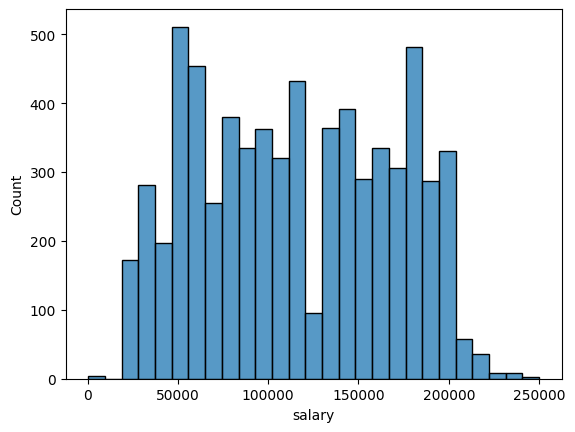

In [98]:
sns.histplot(df.salary)

## the target variable is spread widely so we convert them into log 

In [99]:
salarylog = np.log1p(df.salary)

<Axes: xlabel='salary', ylabel='Count'>

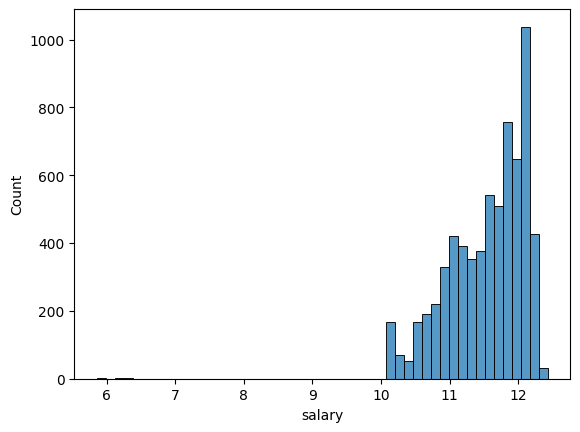

In [100]:
sns.histplot(salarylog,bins=50)

#### now its look better

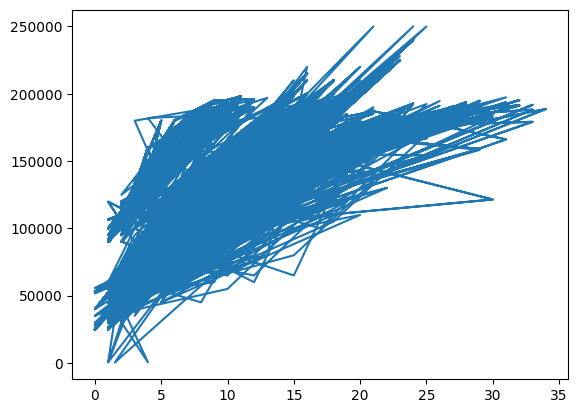

In [101]:
plt.plot(df.years_of_experience,df.salary)

#### i don't know what is this lets use scatter plot

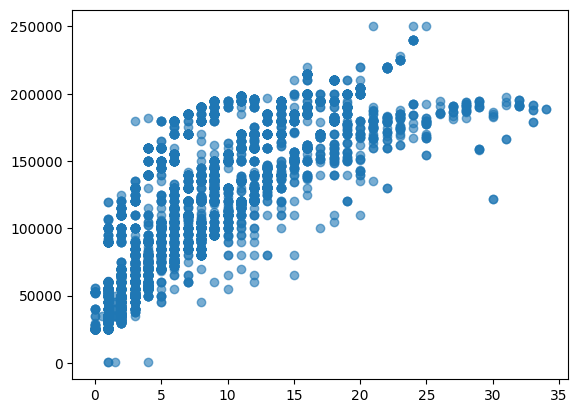

In [102]:
plt.scatter(df['years_of_experience'], df['salary'], alpha=0.6)


#### now we can say that salary increase with experience 

In [103]:
df[df['salary']<15000]

,age,gender,education_level,job_title,years_of_experience,salary
259,29.0,male,bachelor's,junior_business_operations_analyst,1.5,350.0
1890,25.0,female,bachelor's,front_end_developer,1.0,550.0
2654,23.0,male,phd,software_engineer_manager,1.0,579.0
4633,31.0,female,bachelor's,junior_hr_coordinator,4.0,500.0


#### i want to remove these records since this records are irrelavent

In [104]:
df = df[df['salary'] >= 15000]
df['salary'].min()

np.float64(25000.0)

In [105]:
df.nunique()

age                     41
gender                   3
education_level          4
job_title              190
years_of_experience     37
salary                 440
dtype: int64

In [106]:
df['job_title'].nunique()

190

### here the job_title column has more categorical values so it may affect the model accuracy so i am reduceing it

In [107]:
title_counts = df['job_title'].value_counts()
valid_titles = title_counts[title_counts >= 51].index

df = df[df['job_title'].isin(valid_titles)]
df.count()

age                    5875
gender                 5875
education_level        5875
job_title              5875
years_of_experience    5875
salary                 5875
dtype: int64

In [108]:
df['job_title'].nunique()

38

### now everything is good lets split the dataset for training

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
df_full_train,df_test=train_test_split(df,test_size=0.2,random_state=2)
df_train,df_val = train_test_split(df_full_train,test_size=0.25,random_state=2)

In [111]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

### now the features are ready

In [112]:
y_train = np.log1p(df_train.salary)
y_val   = np.log1p(df_val.salary)
y_test  = np.log1p(df_test.salary) 


### and target value is also ready

In [113]:
del df_train['salary']
del df_val['salary']
del df_test['salary']


### lets train the random forest 

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score


In [115]:
train_dicts = df_train.to_dict(orient='records')

In [116]:
dv=DictVectorizer(sparse=False)
X_train =dv.fit_transform(train_dicts)

In [117]:
val_dict = df_val.to_dict(orient='records')

In [118]:
X_val = dv.transform(val_dict)

In [119]:
test_dict = df_test.to_dict(orient='records')

In [120]:
X_test = dv.transform(test_dict)

In [121]:
dv.get_feature_names_out()

array(['age', "education_level=bachelor's", 'education_level=high_school',
       "education_level=master's", 'education_level=phd', 'gender=female',
       'gender=male', 'gender=other', 'job_title=back_end_developer',
       'job_title=content_marketing_manager', 'job_title=data_analyst',
       'job_title=data_scientist', 'job_title=digital_marketing_manager',
       'job_title=director_of_data_science', 'job_title=director_of_hr',
       'job_title=director_of_marketing', 'job_title=financial_manager',
       'job_title=front_end_developer', 'job_title=full_stack_engineer',
       'job_title=human_resources_manager',
       'job_title=junior_hr_generalist',
       'job_title=junior_marketing_manager',
       'job_title=junior_sales_associate',
       'job_title=junior_software_developer',
       'job_title=junior_software_engineer',
       'job_title=marketing_analyst', 'job_title=marketing_coordinator',
       'job_title=marketing_director', 'job_title=marketing_manager',
       '

### okay lets train with Random Forest

In [122]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [123]:
rf = RandomForestRegressor(n_estimators=160,random_state=1)
rf.fit(X_train,y_train)

,n_estimators,160
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [124]:
y_pred = rf.predict(X_val)
print("RMSE:",mean_squared_error(y_val,y_pred))

RMSE: 0.004933506805588366


In [125]:
from sklearn.metrics import r2_score
print("R² score:", r2_score(y_val, y_pred))

R² score: 0.9821614849153605


### model performs well with validation lets try test dataset with R² score: 0.9811319522339068 

In [126]:
y_pred = rf.predict(X_test)

In [127]:
r2_score(y_test,y_pred)

0.9831445907721885

In [128]:
mean_squared_error(y_test,y_pred)

0.004827751610640553

<Axes: xlabel='salary', ylabel='Count'>

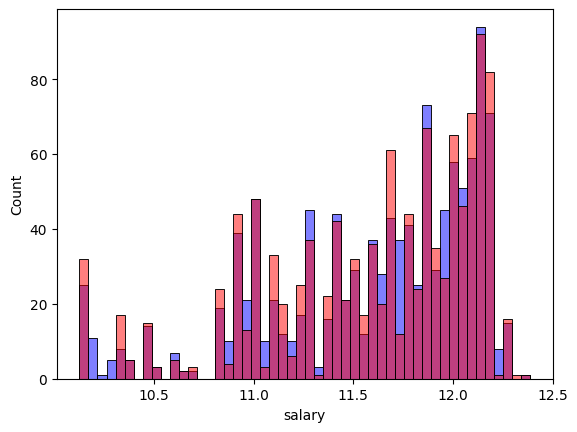

In [129]:
sns.histplot(y_pred,alpha =0.5,bins=50,color='blue' )
sns.histplot(y_test,alpha=0.5,bins=50,color='red')

## now we are going to predict the single salary

In [130]:
id = 469
emp =  df_test.iloc[id].to_dict()
emp

{'age': 35.0,
 'gender': 'female',
 'education_level': "master's",
 'job_title': 'data_scientist',
 'years_of_experience': 10.0}

In [131]:
df_small = pd.DataFrame([emp])
df_small

,age,gender,education_level,job_title,years_of_experience
0,35.0,female,master's,data_scientist,10.0


In [132]:
X_emp = dv.transform(emp)

In [133]:
y_pred = rf.predict(X_emp)

In [134]:
psalary = np.expm1(y_pred)

In [135]:
asalary = np.expm1(y_test[id])

In [136]:
print ("the actural salary: %i \n the predicted salary: %i \n the difference in salary: "%(asalary,psalary),int((asalary-psalary)))

the actural salary: 145000 
 the predicted salary: 141743 
 the difference in salary:  3256


C:\Users\gbbab\AppData\Local\Temp\ipykernel_22200\3956897241.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ("the actural salary: %i \n the predicted salary: %i \n the difference in salary: "%(asalary,psalary),int((asalary-psalary)))


# the model's predictions are very good as the above salary are per month as Indian Rupees
## for you better under standing lets convert them into US dollers

In [137]:
print ("the actural salary: $%i \n the predicted salary: $%i \n the difference in salary: $"%(asalary/88,psalary/88),int((asalary-psalary)/88))

the actural salary: $1647 
 the predicted salary: $1610 
 the difference in salary: $ 37


C:\Users\gbbab\AppData\Local\Temp\ipykernel_22200\3029420915.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ("the actural salary: $%i \n the predicted salary: $%i \n the difference in salary: $"%(asalary/88,psalary/88),int((asalary-psalary)/88))


## now lets save and load the model

In [138]:
import pickle

In [139]:
with open('salary.bin','wb') as f_out:
    pickle.dump((dv,rf),f_out)
    

### now load the model

In [140]:
import pickle
import numpy as np

In [141]:
with open('salary.bin','rb') as f_in:
    dv,rf =  pickle.load(f_in)
    

In [142]:
employee = {'age': 33.0,
 'gender': 'female',
 'education_level': "master's",
 'job_title': 'sales_manager',
 'years_of_experience': 10.0}

In [143]:
x = dv.transform([employee])

In [144]:
sa =  np.expm1(rf.predict(x))
sa

array([116122.88114202])